In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
df = pd.read_csv('Wholesale customers data.csv')#データの読み込み

In [2]:
df.describe() #データの観察

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
df['Total'] = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].sum(axis=1)
df[['Region','Total']].groupby(['Region']).count()
#1:Lisbon, 2:Operto, 3:Other Regions

,Total
Region,
1,77
2,47
3,316


In [4]:
df.drop('Channel',axis=1).groupby(['Region']).sum()
#Regionごとの合計金額

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Region,,,,,,,
1,854833,422454,570037,231026,204136,104327,2386813
2,464721,239144,433274,190132,173311,54506,1555088
3,3960577,1888759,2495251,930492,890410,512110,10677599


In [5]:
df.drop('Channel',axis=1).groupby(['Region']).mean()
#Regionごとの平均額
#1:Grocery,Detergents_paper少なめ、2:Grocery,Frozen,Detergent_paper多め、3:Grocery,Frozen,D_P以外は多い

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Region,,,,,,,
1,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,30997.571429
2,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,33086.978723
3,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266,33789.870253


In [6]:
#Channelごとに観察（1:Horeca,2:Retail）
df[['Channel','Total']].groupby(['Channel']).count()

,Total
Channel,
1,298
2,142


In [7]:
#Channelごとの合計金額
df.drop('Region',axis=1).groupby(['Channel']).sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Channel,,,,,,,
1,4015717,1028614,1180717,1116979,235587,421955,7999569
2,1264414,1521743,2317845,234671,1032270,248988,6619931


In [8]:
#Channelごとの平均額
#Fresh,FrozenではHoreca,それ以外ではRetailの圧勝（ポルトガルの食生活が不明なため分析はできなかった）
df.drop('Region',axis=1).groupby(['Channel']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Channel,,,,,,,
1,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,26844.191275
2,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,46619.232394


In [9]:
#サンプル数
df[['Region','Channel','Total']].groupby(['Region','Channel']).count()

Total
Region Channel       
1      1           59
       2           18
2      1           28
       2           19
3      1          211
       2          105

In [10]:
df.groupby(['Region','Channel']).sum()

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
1      1         761233   228342   237542  184512             56081   
       2          93600   194112   332495   46514            148055   
2      1         326215    64519   123074  160861             13516   
       2         138506   174625   310200   29271            159795   
3      1        2928269   735753   820101  771606            165990   
       2        1032308  1153006  1675150  158886            724420   

                Delicassen    Total  
Region Channel                       
1      1             70632  1538342  
       2             33695   848471  
2      1             30965   719150  
       2             23541   835938  
3      1            320358  5742077  
       2            191752  4935522

In [11]:
df.groupby(['Region','Channel']).mean()

Fresh          Milk       Grocery       Frozen  \
Region Channel                                                          
1      1        12902.254237   3870.203390   4026.135593  3127.322034   
       2         5200.000000  10784.000000  18471.944444  2584.111111   
2      1        11650.535714   2304.250000   4395.500000  5745.035714   
       2         7289.789474   9190.789474  16326.315789  1540.578947   
3      1        13878.052133   3486.981043   3886.734597  3656.900474   
       2         9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen         Total  
Region Channel                                               
1      1              950.525424  1197.152542  26073.593220  
       2             8225.277778  1871.944444  47137.277778  
2      1              482.714286  1105.892857  25683.928571  
       2             8410.263158  1239.000000  43996.736842  
3      1              786.682464  1518.284360  27213.635071  
       2             6899.238095  1826.209524  47004.971429

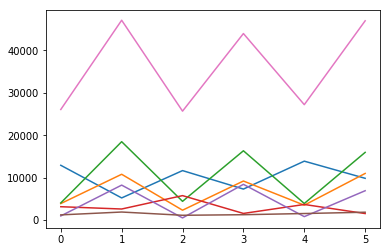

In [12]:
v = df.groupby(['Region','Channel']).mean().values
plt.plot(v)
plt.show()

In [13]:
#外れ値除去
df = df.loc[df.Milk<20000]
df = df.loc[df.Grocery<30000]
df = df.loc[df.Frozen<15000]
df = df.loc[df.Detergents_Paper<16000]
df = df.loc[df.Delicassen<5000]
df = df.loc[df.Fresh<35000]

In [14]:
#Channelごと、Regionごとに分けてクラスタリングしてみる
df_r1 = df.loc[df.Region == 1]
df_r2 = df.loc[df.Region == 2]
df_r3 = df.loc[df.Region == 3]

df_c1 = df.loc[df.Channel == 1]
df_c2 = df.loc[df.Channel == 2]

In [15]:
X_r1 = df_r1.loc[:, ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
X_r2 = df_r2.loc[:, ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
X_r3 = df_r3.loc[:, ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values

X_c1 = df_c1.loc[:, ['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
X_c2 = df_c2.loc[:, ['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values

In [16]:
#データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_r1)       # 与えられた行列の各特徴量について､平均と標準偏差を算出
scaler.fit(X_r2)    
scaler.fit(X_r3)    
scaler.fit(X_c1)    
scaler.fit(X_c2)    
X_r1_std = scaler.fit_transform(X_r1) # Xを標準化した行列を生成
X_r2_std = scaler.fit_transform(X_r2)
X_r3_std = scaler.fit_transform(X_r3)
X_c1_std = scaler.fit_transform(X_c1)
X_c2_std = scaler.fit_transform(X_c2)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


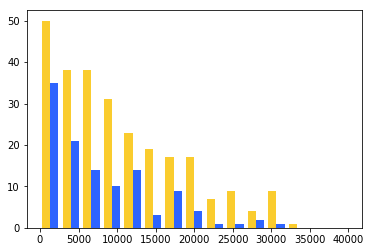

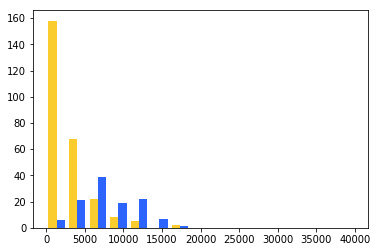

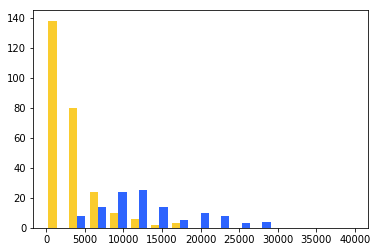

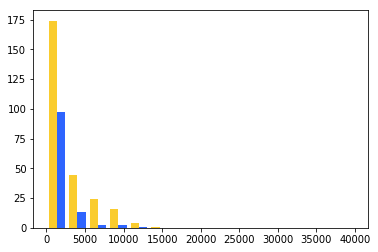

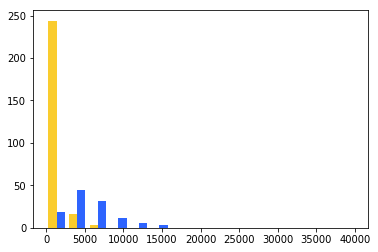

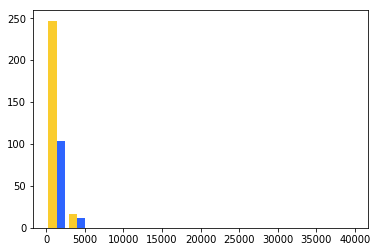

In [17]:
#データを観察（黄色：Horeca, 青：Retail）
#Milk,Grocery,Detergent_PaperはHorecaで少額、Retailで高額となっている（普段使いのものはRetailで購入しているのだろう）
plt.hist([df_c1['Fresh'],df_c2['Fresh']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,40000))
plt.show()
plt.hist([df_c1['Milk'],df_c2['Milk']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,40000))
plt.show()
plt.hist([df_c1['Grocery'],df_c2['Grocery']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,40000))
plt.show()
plt.hist([df_c1['Frozen'],df_c2['Frozen']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,40000))
plt.show()
plt.hist([df_c1['Detergents_Paper'],df_c2['Detergents_Paper']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,40000))
plt.show()
plt.hist([df_c1['Delicassen'],df_c2['Delicassen']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,40000))
plt.show()

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


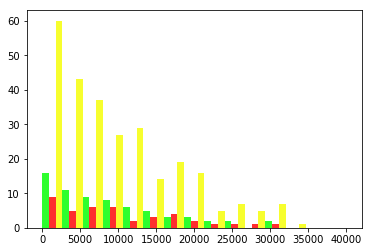

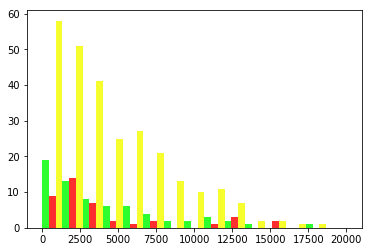

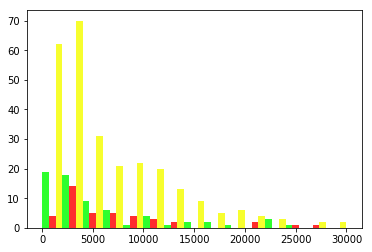

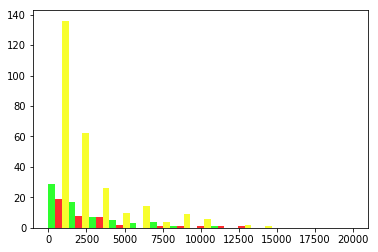

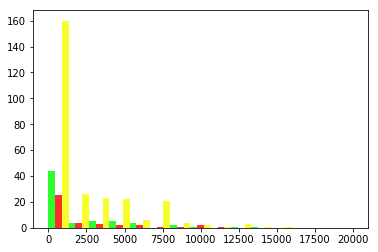

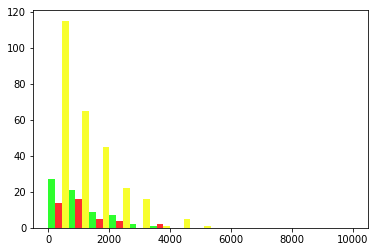

In [18]:
plt.hist([df_r1['Fresh'],df_r2['Fresh'],df_r3['Fresh']],
         bins=15, label=['Lisbon','Oporto','Other Region'], 
         color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,40000))
plt.show()
plt.hist([df_r1['Milk'],df_r2['Milk'],df_r3['Milk']],
         bins=15, label=['Lisbon','Oporto','Other Region'], 
         color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,20000))
plt.show()
plt.hist([df_r1['Grocery'],df_r2['Grocery'],df_r3['Grocery']],
         bins=15, label=['Lisbon','Oporto','Other Region'], 
         color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,30000))
plt.show()
plt.hist([df_r1['Frozen'],df_r2['Frozen'],df_r3['Frozen']],
         bins=15, label=['Lisbon','Oporto','Other Region'], 
         color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,20000))
plt.show()
plt.hist([df_r1['Detergents_Paper'],df_r2['Detergents_Paper'],df_r3['Detergents_Paper']],
         bins=15, label=['Lisbon','Oporto','Other Region'], 
         color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,20000))
plt.show()
plt.hist([df_r1['Delicassen'],df_r2['Delicassen'],df_r3['Delicassen']],
         bins=15, label=['Lisbon','Oporto','Other Region'], 
         color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,10000))
plt.show()

In [19]:
# 主成分分析を実行
from sklearn.decomposition import PCA
pca = PCA(n_components=7) # 主成分を2つまで取得
X_r1_pca = pca.fit_transform(X_r1_std)
pca.components_
np.sqrt(pca.explained_variance_)
print(pca.components_ * np.sqrt(pca.explained_variance_)[:, np.newaxis])#因子寄与率を算出

X_r2_pca = pca.fit_transform(X_r2_std)
pca.components_
np.sqrt(pca.explained_variance_)
print(pca.components_ * np.sqrt(pca.explained_variance_)[:, np.newaxis])

X_r3_pca = pca.fit_transform(X_r3_std)
pca.components_
np.sqrt(pca.explained_variance_)
print(pca.components_ * np.sqrt(pca.explained_variance_)[:, np.newaxis])

X_c1_pca = pca.fit_transform(X_c1_std)
pca.components_
np.sqrt(pca.explained_variance_)
print(pca.components_ * np.sqrt(pca.explained_variance_)[:, np.newaxis])

X_c2_pca = pca.fit_transform(X_c2_std)
pca.components_
np.sqrt(pca.explained_variance_)
print(pca.components_ * np.sqrt(pca.explained_variance_)[:, np.newaxis])

[[ 0.82872542 -0.41436534  0.85210692  0.93245296 -0.17824038  0.92158961
   0.29800308]
 [ 0.04670517  0.57030844  0.10714178  0.08154054  0.63497112 -0.10021247
   0.79131255]
 [-0.14851983  0.5193527   0.11821002  0.09121775 -0.73124102 -0.03772761
   0.19104763]
 [-0.33229811 -0.48360029  0.20671841 -0.13172568 -0.13546758 -0.14622192
   0.4439193 ]
 [ 0.36819163 -0.11105125 -0.39509851 -0.10142423 -0.1634883  -0.02561346
   0.25019484]
 [ 0.23945051  0.0086198   0.23970475 -0.12038719 -0.01973525 -0.2950651
  -0.0619267 ]
 [-0.02832881 -0.04688301 -0.08554904  0.29762702  0.00328102 -0.21273901
  -0.01319879]]
[[ 0.87021565 -0.35305981  0.88762468  0.92414848 -0.44066238  0.95480764
   0.12021454]
 [ 0.17857427  0.43614413  0.13324746  0.06839795  0.57607929 -0.03689224
   0.88329336]
 [-0.02102455  0.80240398  0.04461573  0.07107832 -0.50228948 -0.01649097
  -0.07728543]
 [-0.03622485 -0.253904    0.05852135 -0.20448728 -0.49069177 -0.20064365
   0.45134657]
 [ 0.47970597  0.0342

In [20]:
"""
以上より,
第一主成分は日用品(Milk,Grocery,Detergent_Paper)への支出額,
第二主成分は食品(Grocery,Delicassen)への支出額（地域ごとの場合）
    　　　 生鮮品(Fresh)への支出額（販売チャネルごとの場合）
であった.
"""

'\n以上より,\n第一主成分は日用品(Milk,Grocery,Detergent_Paper)への支出額,\n第二主成分は食品(Grocery,Delicassen)への支出額（地域ごとの場合）\n    \u3000\u3000\u3000 生鮮品(Fresh)への支出額（販売チャネルごとの場合）\nであった.\n'

In [21]:
# k-means法を実行
from sklearn.cluster import KMeans
km_2 = KMeans(n_clusters=2,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いての実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

km_3 = KMeans(n_clusters=3,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いての実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

km_4 = KMeans(n_clusters=4,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いての実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

In [22]:
# クラスタリングの結果を出力
import matplotlib.pyplot as plt
% matplotlib inline

# クラスタリングの結果をプロットする関数
# (クラスタの数, 学習器, 学習データ)
def kmeans_plot(n_clusters, km, X):
    # クラスタの予測値を算出
    y_km = km.fit_predict(X)
    
    # クラスタごとに散布図をプロット
    # 5クラスまでプロットできる
    for i, color, marker in zip(range(n_clusters), 'rgbcm', '>o+xv'):
        plt.scatter(X[y_km==i, 0],            # 横軸の値
                    X[y_km==i, 1],            # 縦軸の値
                    color=color,              # プロットの色
                    marker=marker,            # プロットの形
                    label='cluster ' + str(i) # ラベル
                   )
    
    # クラスタの中心をプロット
    plt.scatter(km.cluster_centers_[:, 0],    # 横軸の値
                km.cluster_centers_[:, 1],    # 縦軸の値
                color='y',                    # プロットの色
                marker='*',                   # プロットの形
                label='centroids',            # ラベル
                s=300,                        # プロットのサイズを大きくして見やすくする
               )
    
    plt.legend()
    plt.grid()
    plt.show()

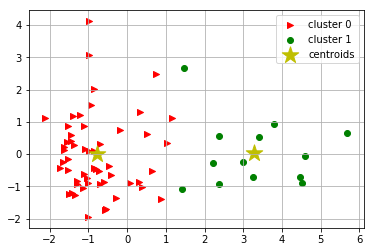

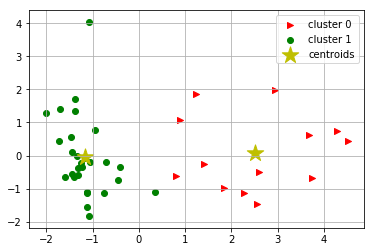

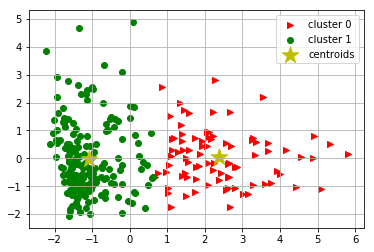

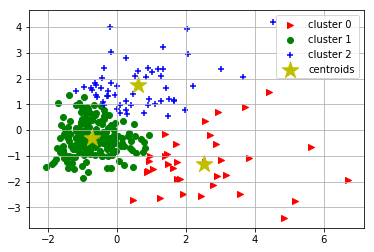

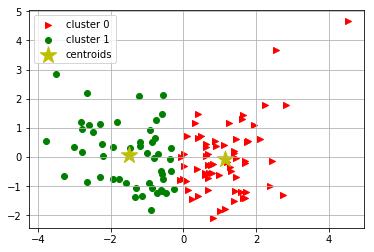

In [23]:
# プロットを実行
kmeans_plot(2, km_2, X_r1_pca[:, 0:3])
kmeans_plot(2, km_2, X_r2_pca[:, 0:3])
kmeans_plot(2, km_2, X_r3_pca[:, 0:3])
kmeans_plot(3, km_3, X_c1_pca[:, 0:3])
kmeans_plot(2, km_2, X_c2_pca[:, 0:3])

In [24]:
from sklearn.metrics import silhouette_samples

y_r1_km = km_2.fit_predict(X_r1_pca[:, 0:3])
y_r2_km = km_2.fit_predict(X_r2_pca[:, 0:3])
y_r3_km = km_2.fit_predict(X_r3_pca[:, 0:3])
y_c1_km = km_3.fit_predict(X_c1_pca[:, 0:3])
y_c2_km = km_2.fit_predict(X_c2_pca[:, 0:3])

# 全サンプルのシルエット係数を計算
# (X, y_km, 利用する距離の種類)
# 'euclidiean' はユークリッド距離
s_r1 = silhouette_samples(X_r1_pca[:, 0:3], y_r1_km, metric='euclidean')
s_r2 = silhouette_samples(X_r2_pca[:, 0:3], y_r2_km, metric='euclidean')
s_r3 = silhouette_samples(X_r3_pca[:, 0:3], y_r3_km, metric='euclidean')
s_c1 = silhouette_samples(X_c1_pca[:, 0:3], y_c1_km, metric='euclidean')
s_c2 = silhouette_samples(X_c2_pca[:, 0:3], y_c2_km, metric='euclidean')

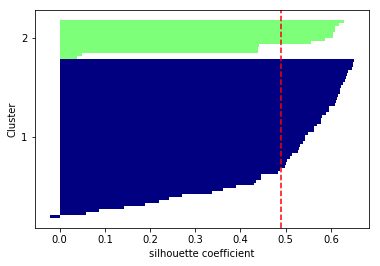

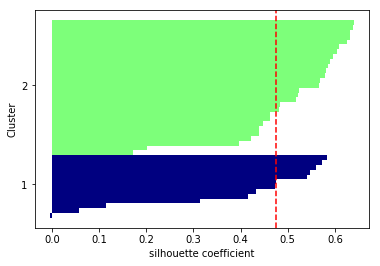

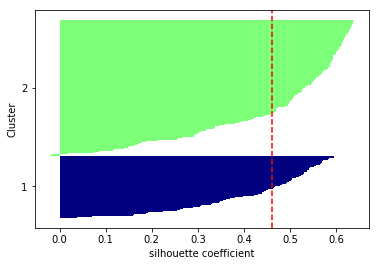

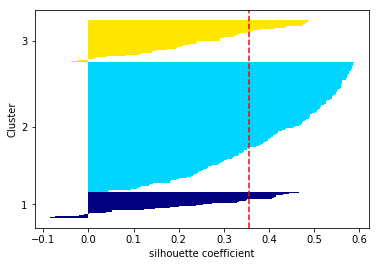

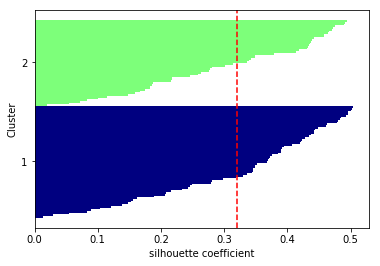

In [25]:
# シルエット図を出力
from matplotlib import cm

# シルエット図を出力する関数を定義
def draw_silhouettes(X, y_km):
    cluster_labels = np.unique(y_km)                     # クラスラベルを重複なく抽出
    n_clusters = cluster_labels.shape[0]                 # クラスタの数を算出

    # シルエット係数を計算
    # (X, y_km, 距離の種類)
    s = silhouette_samples(X, y_km, metric='euclidean')

    # 各ラベルごとにシルエット図を描画
    y_ax_lower, y_ax_upper= 0, 0                         # シルエット図の上端と下端の初期値を設定
    yticks = []                                          # 縦軸のメモリ位置を格納するリストを生成
    for i, label in enumerate(cluster_labels):
            label_s = s[y_km==label]                     # 該当するクラスタについて､シルエット係数を算出
            label_s.sort()                               # シルエット係数を小さい順に並べ替える
            y_ax_upper += len(label_s)                   # シルエット図の上端を､サンプルの数だけ引き上げる
            color = cm.jet(float(i) / n_clusters)        # color mapから色を取得
            plt.barh(range(y_ax_lower, y_ax_upper),      # 横軸の範囲を指定
                             label_s,                    # バーの幅を指定
                             height=1.0,                 # バーの厚みを指
                             color=color)                # バーの色を指定
            yticks.append((y_ax_lower + y_ax_upper) / 2) # クラスタラベルの表示位置を追加
            y_ax_lower += len(label_s)                   # シルエット図の下端を､サンプルの数だけ引き上げる

            
    plt.axvline(np.mean(s), color="red", linestyle="--") # 係数の平均値に破線を引く(横軸の値, 色, 線の形式)
    plt.yticks(yticks, cluster_labels + 1)               # クラスタレベルを表示(位置, 縦軸の値)
    plt.ylabel('Cluster')
    plt.xlabel('silhouette coefficient')
    plt.show()

# シルエット図を出力
draw_silhouettes(X_r1_pca[:, 0:3], y_r1_km)
draw_silhouettes(X_r2_pca[:, 0:3], y_r2_km)
draw_silhouettes(X_r3_pca[:, 0:3], y_r3_km)
draw_silhouettes(X_c1_pca[:, 0:3], y_c1_km)
draw_silhouettes(X_c2_pca[:, 0:3], y_c2_km)

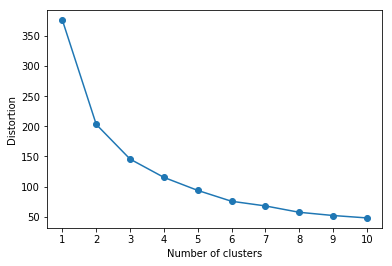

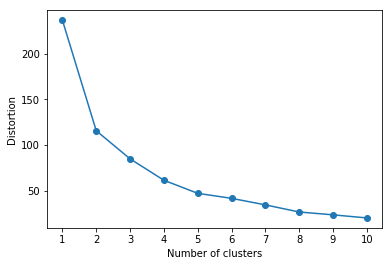

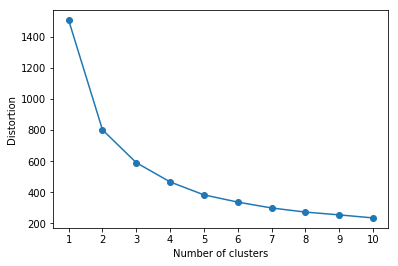

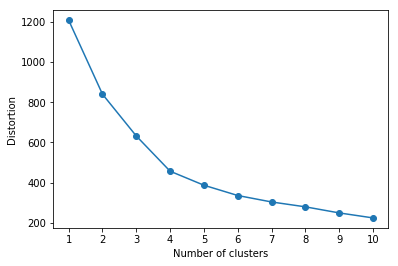

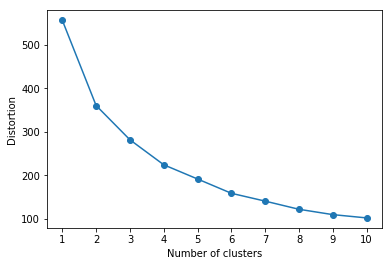

In [26]:
# エルボー法による､適切なkの値の確認

# 各kで算出されたSSEを格納するリストを定義
distortions = []

# kを変えながらk-means法を実行
for k  in range(1,11):              # 1~10クラスタまで繰り返し計算 
    km = KMeans(n_clusters=k,       # クラスタの数をk個に指定
                init='random',   # セントロイドの初期値をk-means++法で設定
                n_init=10,          # セントロイドの初期値を変えての繰り返し回数を指定
                max_iter=300,       # 一回の最適化の繰り返し回数を指定
                random_state=0)     # 乱数の生成状態を指定
    
    km.fit(X_r1_pca[:, 0:3])                       # クラスタリングの計算を実行
    distortions.append(km.inertia_) # SSEをリストに格納していく

# 結果を散布図に出力
plt.plot(range(1,11), distortions,marker='o') # 1から10までのSSEを順にプロット
plt.xticks([i for i in range(1, 11)])         # 横軸のメモリを1から10までの1刻みに設定
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

distortions = []

for k  in range(1,11):              # 1~10クラスタまで繰り返し計算 
    km = KMeans(n_clusters=k,       # クラスタの数をk個に指定
                init='random',   # セントロイドの初期値をk-means++法で設定
                n_init=10,          # セントロイドの初期値を変えての繰り返し回数を指定
                max_iter=300,       # 一回の最適化の繰り返し回数を指定
                random_state=0)     # 乱数の生成状態を指定
    
    km.fit(X_r2_pca[:, 0:3])                       # クラスタリングの計算を実行
    distortions.append(km.inertia_) # SSEをリストに格納していく

# 結果を散布図に出力
plt.plot(range(1,11), distortions,marker='o') # 1から10までのSSEを順にプロット
plt.xticks([i for i in range(1, 11)])         # 横軸のメモリを1から10までの1刻みに設定
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

distortions = []

for k  in range(1,11):              # 1~10クラスタまで繰り返し計算 
    km = KMeans(n_clusters=k,       # クラスタの数をk個に指定
                init='random',   # セントロイドの初期値をk-means++法で設定
                n_init=10,          # セントロイドの初期値を変えての繰り返し回数を指定
                max_iter=300,       # 一回の最適化の繰り返し回数を指定
                random_state=0)     # 乱数の生成状態を指定
    
    km.fit(X_r3_pca[:, 0:3])                       # クラスタリングの計算を実行
    distortions.append(km.inertia_) # SSEをリストに格納していく

# 結果を散布図に出力
plt.plot(range(1,11), distortions,marker='o') # 1から10までのSSEを順にプロット
plt.xticks([i for i in range(1, 11)])         # 横軸のメモリを1から10までの1刻みに設定
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

distortions = []

for k  in range(1,11):              # 1~10クラスタまで繰り返し計算 
    km = KMeans(n_clusters=k,       # クラスタの数をk個に指定
                init='random',   # セントロイドの初期値をk-means++法で設定
                n_init=10,          # セントロイドの初期値を変えての繰り返し回数を指定
                max_iter=300,       # 一回の最適化の繰り返し回数を指定
                random_state=0)     # 乱数の生成状態を指定
    
    km.fit(X_c1_pca[:, 0:3])                       # クラスタリングの計算を実行
    distortions.append(km.inertia_) # SSEをリストに格納していく

# 結果を散布図に出力
plt.plot(range(1,11), distortions,marker='o') # 1から10までのSSEを順にプロット
plt.xticks([i for i in range(1, 11)])         # 横軸のメモリを1から10までの1刻みに設定
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

distortions = []

for k  in range(1,11):              # 1~10クラスタまで繰り返し計算 
    km = KMeans(n_clusters=k,       # クラスタの数をk個に指定
                init='random',   # セントロイドの初期値をk-means++法で設定
                n_init=10,          # セントロイドの初期値を変えての繰り返し回数を指定
                max_iter=300,       # 一回の最適化の繰り返し回数を指定
                random_state=0)     # 乱数の生成状態を指定
    
    km.fit(X_c2_pca[:, 0:3])                       # クラスタリングの計算を実行
    distortions.append(km.inertia_) # SSEをリストに格納していく

# 結果を散布図に出力
plt.plot(range(1,11), distortions,marker='o') # 1から10までのSSEを順にプロット
plt.xticks([i for i in range(1, 11)])         # 横軸のメモリを1から10までの1刻みに設定
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [27]:
"""
まとめ
日用品および食品への支出度合いは裕福度合いを表していると考えられる。
今回の分析によってある程度消費者の傾向はつかめたので、新しく売りたい商品があるときにアピールすべき顧客層の把握は簡単にできるだろう。
（生鮮品を売りたいのならばHorecaで,Horecaでの消費量が多い地域の住民など）
"""

'\nまとめ\n日用品および食品への支出度合いは裕福度合いを表していると考えられる。\n今回の分析によってある程度消費者の傾向はつかめたので、新しく売りたい商品があるときにアピールすべき顧客層の把握は簡単にできるだろう。\n（生鮮品を売りたいのならばHorecaで,Horecaでの消費量が多い地域の住民など）\n'

In [ ]:
#参考にしたサイト　http://select-from-where.hatenablog.com/entry/2017/09/24/202340#市場細分化に基づくターゲット市場の選定